<a href="https://colab.research.google.com/github/vijayshankarrealdeal/intro_to_pytorch-Gans/blob/main/GansIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from torchvision import transforms

In [68]:
def show_image_from_tensor(image_tensor,num_images = 25,size = (1,28,28)):
    image_unflat = image_tensor.detach().cpu().view(-1, *size)
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()


In [69]:
tensor_matrix = torch.randint(1,255,(1,28,28))

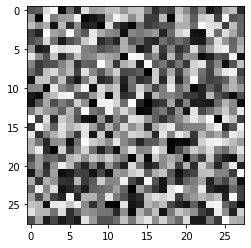

In [70]:
show_image_from_tensor(tensor_matrix)

In [71]:
class Genrator(nn.Module):
  def __init__(self,z_dim = 10 ,hidden_dim = 128,output_shape = 784):
    super(Genrator,self).__init__()
    self.gen = nn.Sequential(
        self.get_genrator_block(z_dim, hidden_dim),
        self.get_genrator_block(hidden_dim, hidden_dim * 2),
        self.get_genrator_block(hidden_dim * 2, hidden_dim * 4),
        self.get_genrator_block(hidden_dim * 4, hidden_dim * 8),
        nn.Linear(hidden_dim * 8,output_shape),
        nn.Sigmoid(),
    )
  def get_genrator_block(self,input_shape,output_shape):
    return nn.Sequential(
        nn.Linear(input_shape,output_shape),
        nn.BatchNorm1d(output_shape),
        nn.ReLU(),
  )
  def forward(self,noise):
    return self.gen(noise)

In [72]:
def genrate_noise(n_sample,z_dim,device = 'cpu'):
  noise = torch.randn(n_sample,z_dim,device = device)
  return noise

In [76]:
class Discriminator(nn.Module):
  def __init__(self,im_dim = 784,hidden_units = 128):
    super(Discriminator,self).__init__()
    self.dis = nn.Sequential(
        self.get_discriminator_block(im_dim,hidden_units*4),
        self.get_discriminator_block(hidden_units*4,hidden_units*2),
        self.get_discriminator_block(hidden_units*2,hidden_units),
        nn.Linear(hidden_units,1)
    )
  def get_discriminator_block(self,input_shape,output_shape):
    return nn.Sequential(
        nn.Linear(input_shape,output_shape),
        nn.LeakyReLU(0.2),
  )
  def forward(self,x):
    return self.dis(x)

In [77]:
criterion = nn.BCEWithLogitsLoss()
n_epochs = 200
z_dim = 64
display_step = 500
batch_size = 128
lr = 0.00001

dataloader = DataLoader(
    MNIST('.', download=True, transform=transforms.ToTensor()),
    batch_size=batch_size,
    shuffle=True)
device = 'cuda'

In [78]:
gen = Genrator(z_dim).to(device)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr)
disc = Discriminator().to(device) 
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr)

In [80]:
def get_disc_loss(gen,dis,criterion,real,num_images,z_dim,device):
  noise = genrate_noise(num_images,z_dim,device)
  fake = gen(noise).detach()

  fake_pred = disc(fake)
  real_pred = disc(real)

  fake_loss = criterion(fake_pred,torch.zeros(num_images, 1).to(device))
  real_loss = criterion(real_pred,torch.ones(num_images, 1).to(device))

  disc_loss = (fake_loss + real_loss) / 2

  return disc_loss

torch.Size([128, 784])


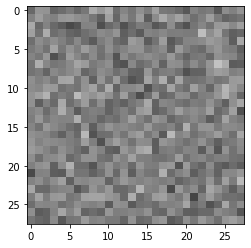

128
None


In [94]:
cur_step = 0

for i in range(n_epochs):
  for real,_ in tqdm(dataloader):
    cur_batch_size = len(real)
    real = real.view(cur_batch_size, -1).to(device)


    noise = genrate_noise(num_images,z_dim,device)
    fake = gen(noise).detach()
    
    fake_pred = disc(fake)
    real_pred = disc(real)
    fake_loss = criterion(fake_pred,torch.zeros(num_images, 1).to(device))
    real_loss = criterion(real_pred,torch.ones(num_images, 1).to(device))
    disc_loss = (fake_loss + real_loss) / 2

    disc_loss.backward(retain_graph=True)
    disc_opt.step()

    gen_opt.zero_grad()
    noise = genrate_noise(num_images,z_dim,device)
    fake = gen(noise).detach()
    fake_pred = disc(fake)
    gen_loss = criterion(fake_pred,torch.ones(num_images,1).to(device))
    gen_loss.backward(retain_graph = True)
    gen_opt.step()

    print(print(len(real)))
    break
  break
